# IMPORT LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/DIQ/PROJECT

Mounted at /gdrive
/gdrive/My Drive/DIQ/PROJECT


In [8]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np


import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, OPTICS, Birch
from sklearn import metrics
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import time as time
import random


#IMPUTATION PHASE

from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor


SEED = 2023



# UTILS - Given functions

A_data_collection

In [3]:
def make_dataset_for_regression(n_samples, n_features, n_informative, n_targets, bias, effective_rank, tail_strength, noise, seed,shuffle):
    X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_targets=n_targets,
                           bias=bias, effective_rank=effective_rank, tail_strength=tail_strength, noise=noise,shuffle=True, coef=True, random_state=seed)
    return X, y, coef

D_data_analysis

In [4]:
@ignore_warnings(category=ConvergenceWarning)
@ignore_warnings(category=FutureWarning)
def regression(X, y, regression, seed):
    X = StandardScaler().fit_transform(X)
    X = np.nan_to_num(X)
    regressor = Ridge()

    if regression == "LinearRegressor":
        regressor = Ridge()
    elif regression == "BayesianRidge":
        regressor = BayesianRidge()
    elif regression == "GPRegressor":
        regressor = GaussianProcessRegressor()
    elif regression == "SVMRegressor":
        regressor = LinearSVR()
    elif regression == "KNNRegressor":
        regressor = KNeighborsRegressor()
    elif regression == "MLPRegressor":
        regressor = MLPRegressor()

    print("Training for " + regression + "...")

    start = time.time()

    model_fit = regressor.fit(X, y)

    cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=seed)

    model_scores = cross_val_score(model_fit, X, y, cv=cv, scoring="neg_root_mean_squared_error")

    stop = time.time()
    speed = stop - start

    mse_mean = abs(model_scores.mean())

    return {"mean_perf": mse_mean,
            "distance": distance_measurement(X, y, regression, True, seed),
            "speed": speed}


def distance_measurement(X, y, method, regression, seed):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score, mean_squared_error

    X = StandardScaler().fit_transform(X)
    X = np.nan_to_num(X)

    N = 8
    distances_train_test = np.zeros(N)
    for i in range(0, N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed + i)

        model = DecisionTreeClassifier()

        if method == "DecisionTree":
            model = DecisionTreeClassifier()
        elif method == "LogisticRegression":
            model = LogisticRegression()
        elif method == "KNN":
            model = KNeighborsClassifier()
        elif method == "RandomForest":
            model = RandomForestClassifier()
        elif method == "AdaBoost":
            model = AdaBoostClassifier()
        elif method == "MLP":
            model = MLPClassifier()
        elif method == "LinearRegressor":
            model = Ridge()
        elif method == "BayesianRidge":
            model = BayesianRidge()
        elif method == "GPRegressor":
            model = GaussianProcessRegressor()
        elif method == "SVMRegressor":
            model = LinearSVR()
        elif method == "KNNRegressor":
            model = KNeighborsRegressor()
        elif method == "MLPRegressor":
            model = MLPRegressor()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_fit = model.predict(X_train)

        if regression:
            mse_pred = abs(mean_squared_error(y_test, y_pred, squared=False))
            mse_fit = abs(mean_squared_error(y_train, y_fit, squared=False))

            distances_train_test[i] = mse_pred - mse_fit
        else:
            weighted_f1_pred = f1_score(y_test, y_pred, average='weighted')
            weighted_f1_fit = f1_score(y_train, y_fit, average='weighted')

            distances_train_test[i] = weighted_f1_fit - weighted_f1_pred

    return distances_train_test.mean()


E_plot_results

In [5]:
import matplotlib.pyplot as plt

#your_path = "folder/" # example of path

def mean(results_all):
    list_mean = []
    for res in results_all:
        list_mean.append(res["mean_perf"])
    return list_mean

def distance(results_all):
    list_over = []
    for res in results_all:
        list_over.append(res["distance"])
    return list_over

def speed(results_all):
    list_speed = []
    for res in results_all:
        list_speed.append(res["speed"])
    return list_speed

def generateFigurePerformance(x_axis, xlabel, results_all, title, legend, score, path):

    plt.title(title)
    CSV = []
    for i in range(0,len(results_all)):

        mean_perf = mean(results_all[i])

        plt.plot(x_axis, mean_perf, marker='o', label=legend[i], markersize=3)
        CSV.append(mean_perf)

    df = pd.DataFrame(CSV, index=legend, columns=x_axis)
    df.to_csv(path + title+'.csv', mode='a',index=True)

    plt.xlabel(xlabel)
    plt.ylabel(score)
    plt.legend()
    #plt.ylim(0.1, 2)  # if you want to fix a limit for the y_axis
    plt.savefig(path + title + ".pdf", bbox_inches='tight') # if you want to save the figure


    plt.show()

def generateFigureDistance(x_axis, xlabel, results_all, title, legend, score, path):

    plt.title(title)
    CSV = []
    for i in range(0,len(results_all)):

        distance_perf = distance(results_all[i])

        plt.plot(x_axis, distance_perf, marker='o', label=legend[i], markersize=3)
        CSV.append(distance_perf)

    df = pd.DataFrame(CSV, index=legend, columns=x_axis)
    df.to_csv(path + title+'.csv', mode='a',index=True)

    plt.xlabel(xlabel)
    plt.ylabel(score)
    plt.legend()
    #plt.ylim(0.1, 2) # if you want to fix a limit for the y_axis
    plt.savefig(path + title + ".pdf", bbox_inches='tight') # if you want to save the figure
    plt.show()

def generateFigureSpeed(x_axis, xlabel, results_all, title, legend, score, path):

    plt.title(title)
    CSV = []
    for i in range(0,len(results_all)):

        speed_perf = speed(results_all[i])

        plt.plot(x_axis, speed_perf, marker='o', label=legend[i], markersize=3)
        CSV.append(speed_perf)

    df = pd.DataFrame(CSV, index=legend, columns=x_axis)
    df.to_csv(path + title+'.csv', mode='a',index=True)

    plt.xlabel(xlabel)
    plt.ylabel(score)
    plt.legend()
    #plt.ylim(0.1, 2)  # if you want to fix a limit for the y_axis
    plt.savefig(path + title + ".pdf", bbox_inches='tight') # if you want to save the figure
    plt.show()

def plot(x_axis_values, x_label, results, title, algorithms, plot_type,path):

    title = str(title)

    if plot_type == "performance":
        if algorithms[0] == "DecisionTree":
            generateFigurePerformance(x_axis_values, x_label, results, title, algorithms, "f1 weighted")
        elif algorithms[0] == "LinearRegressor":
            generateFigurePerformance(x_axis_values, x_label, results, title, algorithms, "RMSE",path)
        else:
            generateFigurePerformance(x_axis_values, x_label, results, title, algorithms, "silhouette")

    elif plot_type == "distance train-test": # only for classification & regression
        if algorithms[0] == "DecisionTree":
            generateFigureDistance(x_axis_values, x_label, results, title, algorithms, "f1_train - f1_test")
        else:
            generateFigureDistance(x_axis_values, x_label, results, title, algorithms, "RMSE_test - RMSE_train",path)

    else:
        generateFigureSpeed(x_axis_values, x_label, results, title, algorithms, "speed",path)



# MAIN - Data Generation

In [ ]:
#X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023,shuffle=True)
X, y = make_dataset_for_regression(n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023,shuffle=False)



In [ ]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
#X_df.head(100)
y_df.head()

,0
0,53.546740
1,2.451879
2,-11.582755
3,6.017205
4,-9.373397


In [ ]:
X_df.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,-0.018361,-0.037786,0.002820
std,0.978938,0.987818,0.979472
min,-3.205283,-2.790145,-3.121532
25%,-0.684521,-0.737478,-0.662016
50%,0.014838,-0.076342,0.030014
75%,0.638007,0.664841,0.651265
max,2.667169,3.173863,3.316958


In [ ]:
X_df.info()

# Print number of null-values for each feature
print('\n----------------------------')
print('\nNULL-values in dataset: ', X_df.isna().sum().sum())
print(X_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       700 non-null    float64
 1   1       550 non-null    float64
 2   2       250 non-null    float64
dtypes: float64(3)
memory usage: 23.6 KB

----------------------------

NULL-values in dataset:  1500
0    300
1    450
2    750
dtype: int64


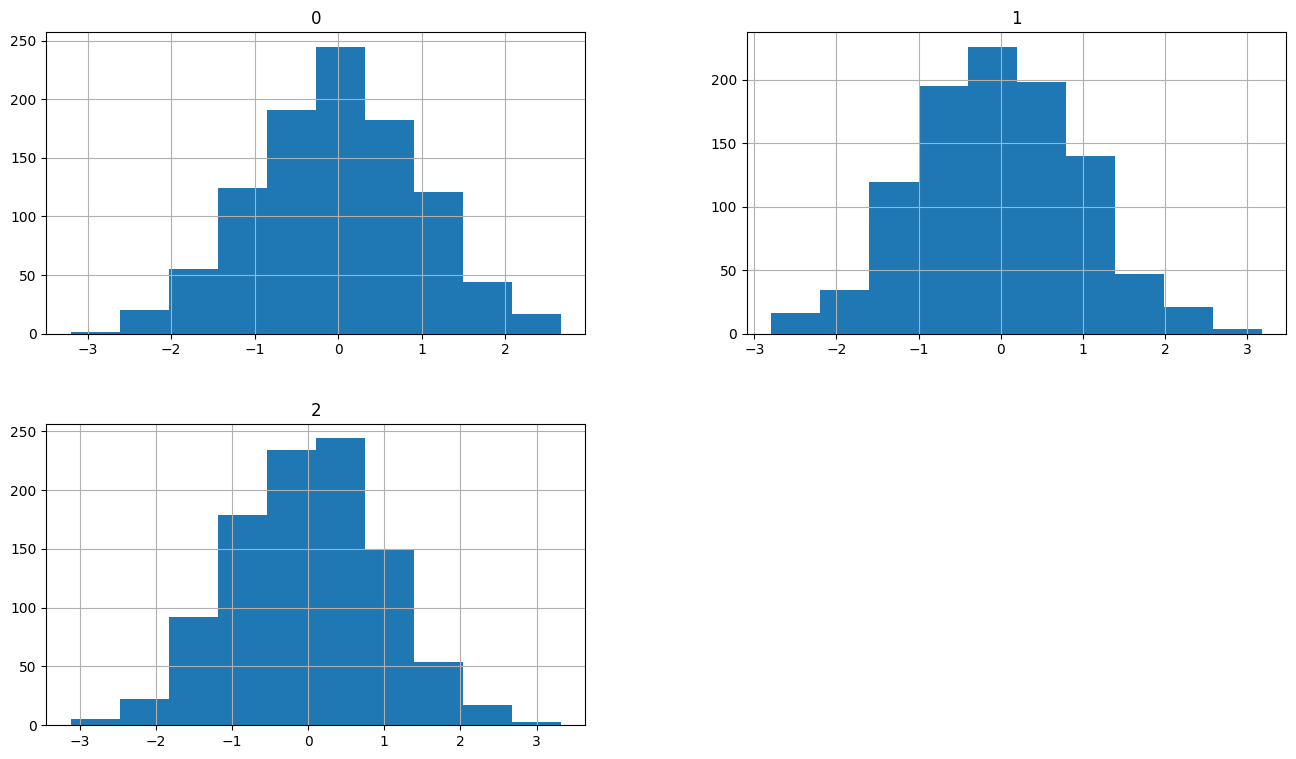

In [ ]:
# Histogram

X_df.hist(figsize=(16,9))
plt.show()

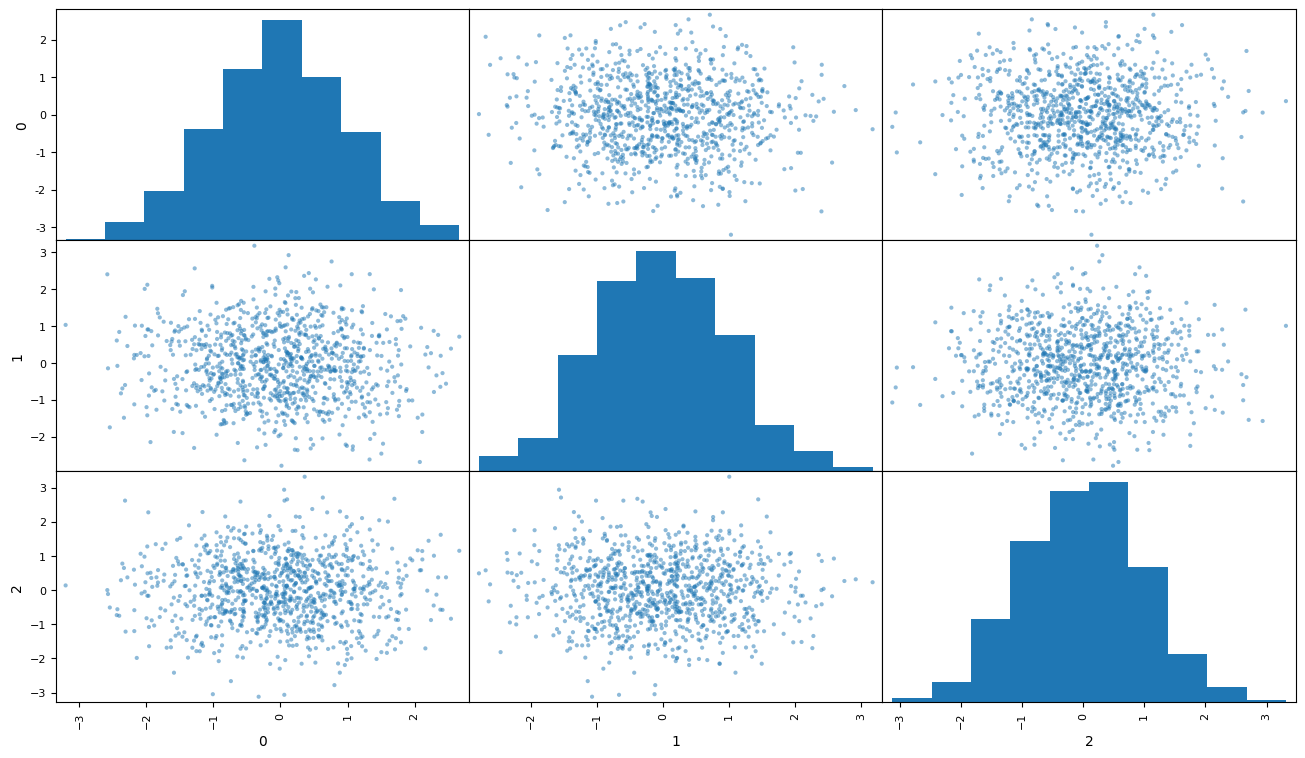

In [ ]:
# Scatter matrix plot

scatter_matrix(X_df, figsize=(16, 9))
plt.show()

# Correlation

          0         1         2         3
0  1.000000  0.231227  0.245539  0.211353
1  0.231227  1.000000 -0.298615  0.454169
2  0.245539 -0.298615  1.000000  0.064755
3  0.211353  0.454169  0.064755  1.000000 
------------



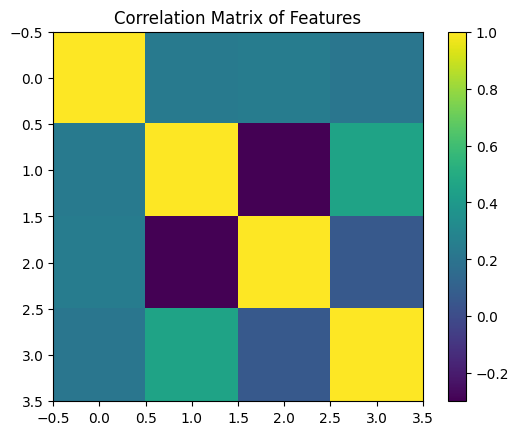

In [ ]:
# No correlation among the features setting effective_rank = None

X, y = make_dataset_for_regression(
                  n_samples=10000,
                  n_features=4,
                  n_informative=1,
                  n_targets=1,
                  bias=0.8,
                  effective_rank=2,
                  tail_strength=0.5,
                  noise=0.0,
                  seed=2023,
                  shuffle=True
                  )

X = pd.DataFrame(X)
print(X.corr(method='pearson'),'\n------------\n')

# Plot the correlation matrix of features
corr_matrix = np.corrcoef(X, rowvar=False)
plt.imshow(corr_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Features')
plt.show()

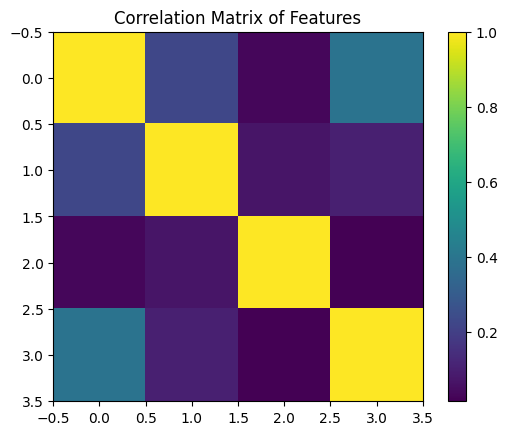

In [ ]:
X, y = make_regression(
    n_samples=1000,
    n_features=4,
    n_informative=4,
    noise=0.0,  # Increase noise for more realistic data
    effective_rank=2,  # Control effective rank for correlation
    random_state=SEED
)

# Plot the correlation matrix of features
corr_matrix = np.corrcoef(X, rowvar=False)
plt.imshow(corr_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Features')
plt.show()

# MNAR distribution

MNAR_values:  1600
Remaining values:  900
TOTAL MISSING VALUES in X:  2428


<Axes: >

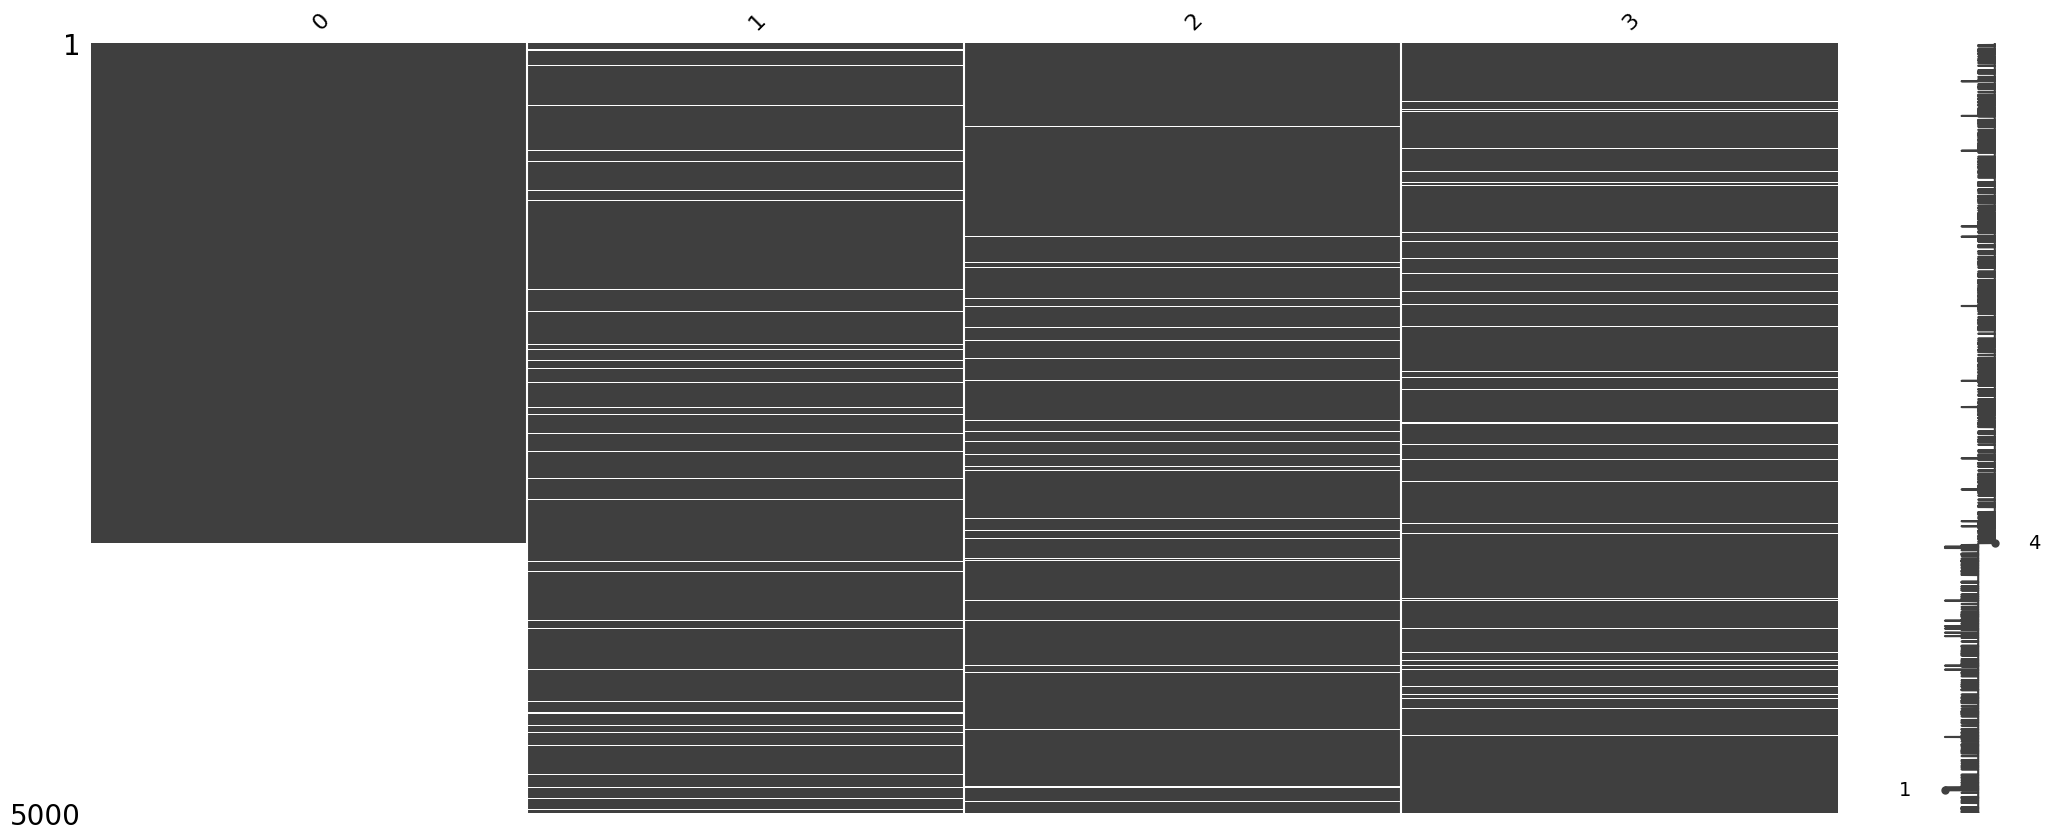

In [19]:
import missingno as msno

X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=4,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
X = pd.DataFrame(X)

generate_MNAR_values_with_uniform(X, 0.5, 0,0.6, 0.8,SEED)
print('TOTAL MISSING VALUES in X: ',X.isna().sum().sum())

msno.matrix(X.sort_values(0))


# MY ULTILS
- Uniform distribution of missing values across the features of the dataset.

In [6]:
# POLLUTION FUNCTIONS

def delete_values_with_uniform_distribution(df, delete_percentage, feature_distribution,seed):
    np.random.seed(seed)
    total_values_to_delete = int(df.size * delete_percentage)

    for feature, percentage in feature_distribution.items():
      values_to_delete = int(total_values_to_delete * percentage)
      delete_positions = np.random.choice(df[:][int(feature)].index, size=values_to_delete, replace=True)
      df.loc[delete_positions, int(feature)] = np.nan



def delete_values_with_uniform_distribution_for_size(dataframe, size, delete_percentage, feature_distribution,seed):
    np.random.seed(seed)

    total_values_to_delete = int(size * delete_percentage)
    for feature, percentage in feature_distribution.items():

        values_to_delete = int(total_values_to_delete * percentage)
        delete_positions = np.random.choice(dataframe[:][int(feature)].index, size=values_to_delete, replace=False)
        dataframe.loc[delete_positions, int(feature)] = np.nan



def generate_MNAR_values_mean(dataframe, delete_percentage, feature, probability_of_missing,seed): # generate only MNAR distribution using mean as cutoff
    np.random.seed(seed)

    column_size = dataframe[:][feature].size
    total_values_to_delete = int(column_size * delete_percentage)
    cutoff = dataframe[:][feature].mean().astype('float16')
    tot_MNAR = 0

    for index, element in dataframe[:][feature].items():
      random_number = random.uniform(0, 1)

      if tot_MNAR >= total_values_to_delete:
        break
      if element < cutoff:
        if random_number < probability_of_missing:
          dataframe.loc[index,feature] = np.nan
          tot_MNAR = tot_MNAR + 1

    assert tot_MNAR <= total_values_to_delete
    print('MNAR_values: ', tot_MNAR)

    remaining_values = total_values_to_delete - tot_MNAR
    print('Remaining values: ', remaining_values)



def generate_MNAR_values_with_uniform(dataframe, delete_percentage, feature,percentile, probability_of_missing,seed):
    np.random.seed(seed)

    column_size = dataframe[:][feature].size
    total_values_to_delete = int(column_size * delete_percentage)
    cutoff = dataframe[feature].quantile(percentile)
    tot_MNAR = 0

    for index, element in dataframe[:][feature].items():
      random_number = random.uniform(0, 1)

      if tot_MNAR >= total_values_to_delete:
        break
      if element >= cutoff:
        if random_number < probability_of_missing:
          dataframe.loc[index,feature] = np.nan
          tot_MNAR = tot_MNAR + 1

    assert tot_MNAR <= total_values_to_delete
    print('MNAR_values: ', tot_MNAR)

    remaining_values = total_values_to_delete - tot_MNAR
    print('Remaining values: ', remaining_values)
    if (remaining_values > 0):
      delete_values_with_uniform_distribution_for_size(dataframe,remaining_values, 1,{'0':  0.25, '1': 0.25, '2':  0.25, '3': 0.25},SEED)



# IMPUTATION FUNCTIONS


def drop_rows_above_threshold(dataframe, y):

    # Combine the DataFrame and target vector for convenient processing
    combined_data = pd.concat([dataframe, pd.Series(y, name='target')], axis=1)


    threshold_count = int((combined_data.shape[1] * 0.5) + 1)
    cleaned_data = combined_data.dropna(thresh=threshold_count)

    # Separate the DataFrame and target vector after dropping rows
    cleaned_dataframe = cleaned_data.iloc[:, :-1]
    cleaned_target = cleaned_data['target'].values

    return cleaned_dataframe, cleaned_target



def simple_imputation(df,method):
   if(method == 'mean' or method == 'median' or method == 'most_frequent'):
     simple_imputer_mean = SimpleImputer(missing_values=np.NaN, strategy = method)
     dataframe_I = simple_imputer_mean.fit_transform(df)
     dataframe_I = pd.DataFrame(dataframe_I, columns = df.columns)

   return dataframe_I


def KNN_imputation(df,neighbors):

   X_copy = df.copy()
   IMPUTER = KNNImputer(n_neighbors=neighbors)
   df_knn = pd.DataFrame(IMPUTER.fit_transform(X_copy))
   df_knn.columns = X_copy.columns

   return df_knn


def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature] = np.random.choice(observed_values, number_missing, replace = True)
    return df


def KNN_mice(df, neighbors, max_iter):
  df_copy = df.copy()
  multivariate_impute_pipeline = ColumnTransformer([("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=neighbors),max_iter=max_iter), df_copy.columns)])
  df_mice = multivariate_impute_pipeline.fit_transform(df_copy)
  df_mice = pd.DataFrame(df_mice, columns=df_copy.columns)

  return df_mice


def BayesianRidge_mice(df,max_iter):
  df_copy = df.copy()
  multivariate_impute_pipeline = ColumnTransformer([("impute_num", IterativeImputer(estimator=BayesianRidge(),max_iter=max_iter), df_copy.columns)])
  df_mice = multivariate_impute_pipeline.fit_transform(df_copy)
  df_mice = pd.DataFrame(df_mice, columns=df_copy.columns)

  return df_mice

# EXPERIMENT - 1

Informative Features:
['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3']

dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  974

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1903

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2773

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3625

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  4428

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  5163

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5904

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  6601

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  7224

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  7833


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 17.972860994875536, 'distance': -2.0

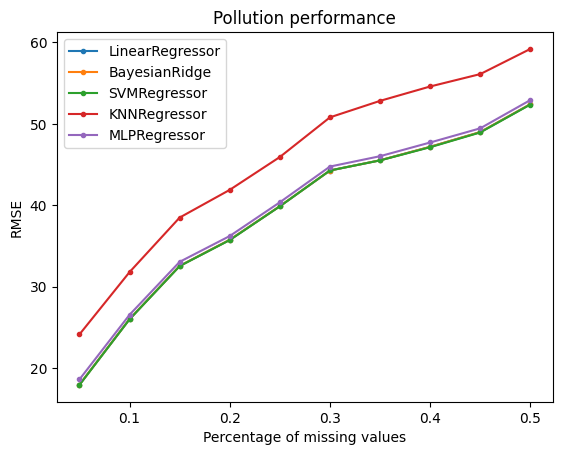

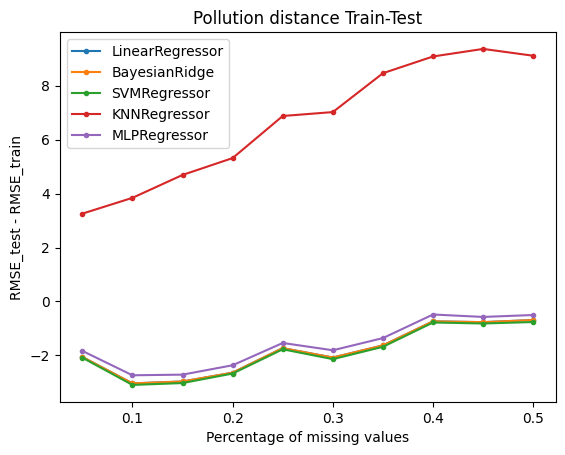

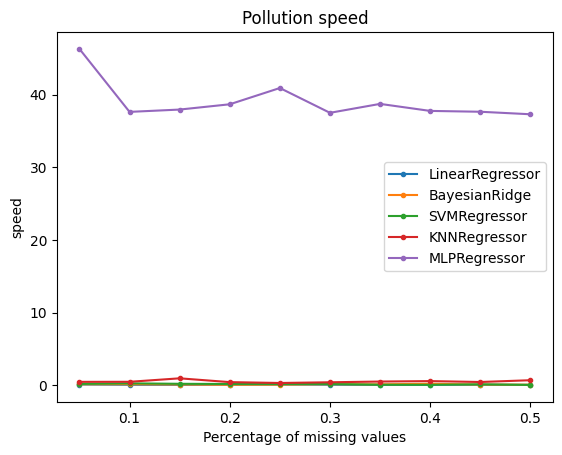



IMPUTATION EVALUATION PLOTS...



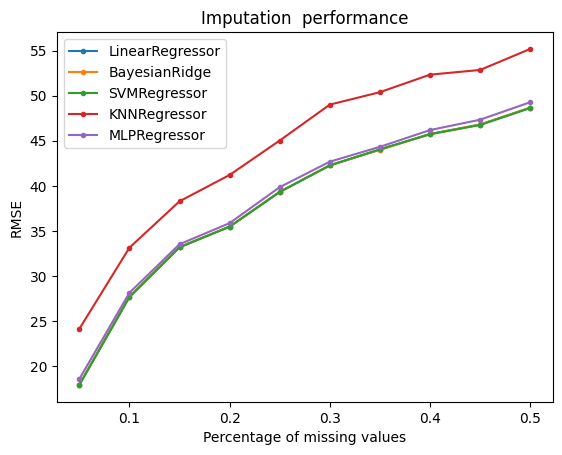

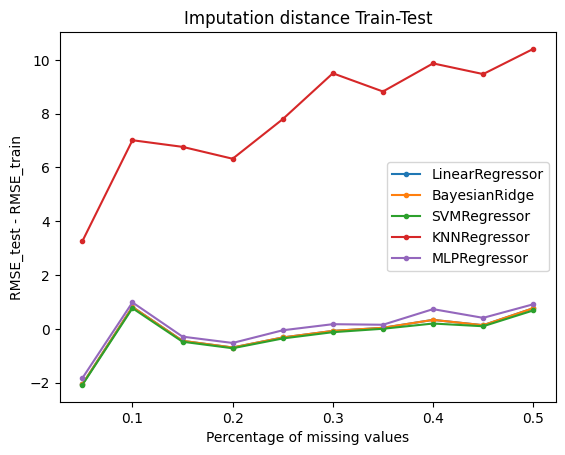

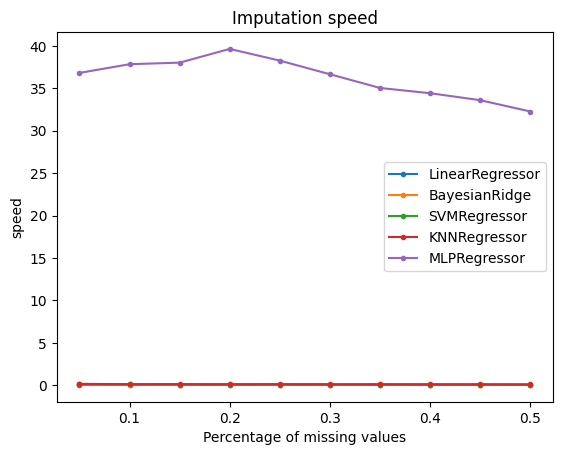

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.25, '1': 0.25, '2':  0.25, '3': 0.25}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=4,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)


# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION

print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_1/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_1/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_1/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_1/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_1/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_1/")


# EXPERIMENT - 2

Informative Features:
['Feature 0', 'Feature 1']

dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  949

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1817

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2579

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3304

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  3923

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  4502

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5017

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  5481

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  5901

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  6297


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 13.108949467772224, 'distance': -1.9017395831110295, 'speed': 

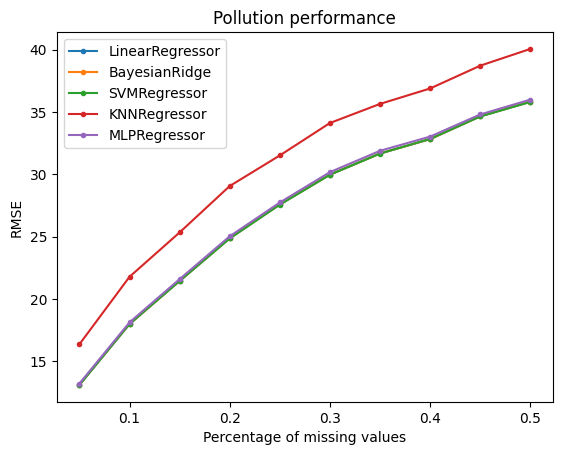

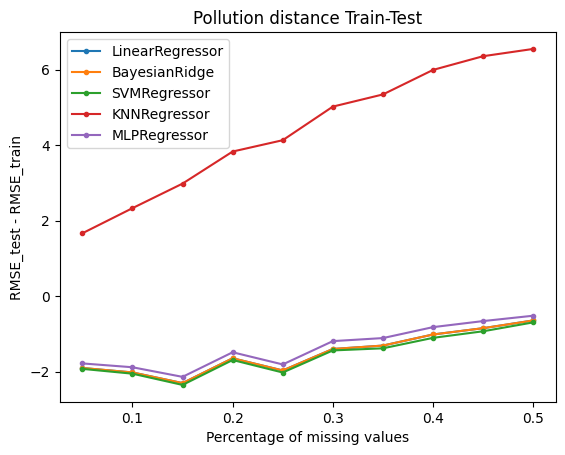

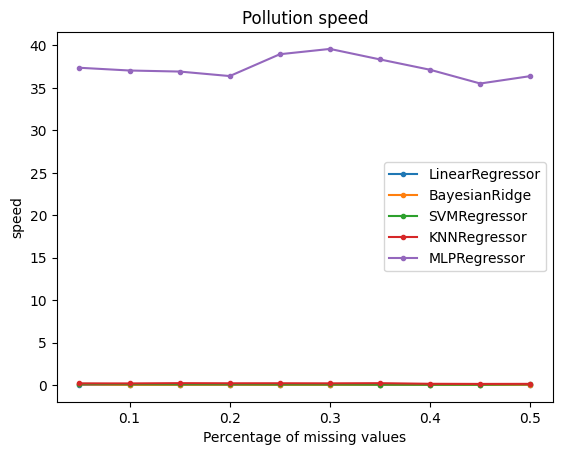



IMPUTATION EVALUATION PLOTS...



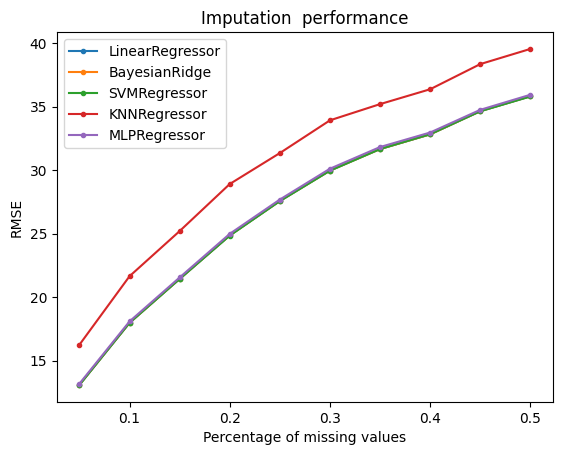

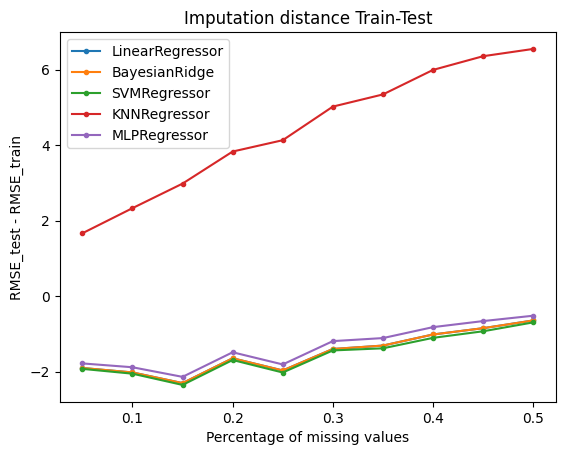

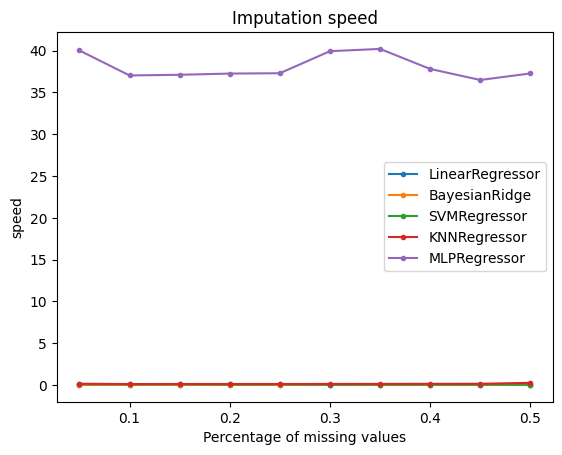

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.5, '1': 0.5, '2':  0, '3': 0}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=2,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)


# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION

print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_2/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_2/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_2/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_2/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_2/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_2/")


# EXPERIMENT - 3

Informative Features:
['Feature 0', 'Feature 1']

dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  949

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1817

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2579

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3304

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  3923

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  4502

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5017

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  5481

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  5901

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  6297


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 1.0061170156169945, 'distance': 0.0021364806676642673, 'speed'

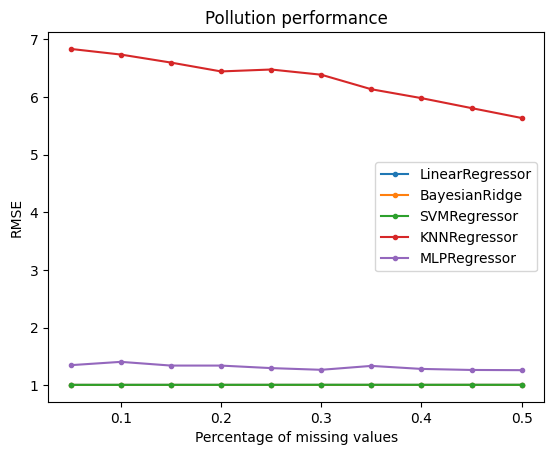

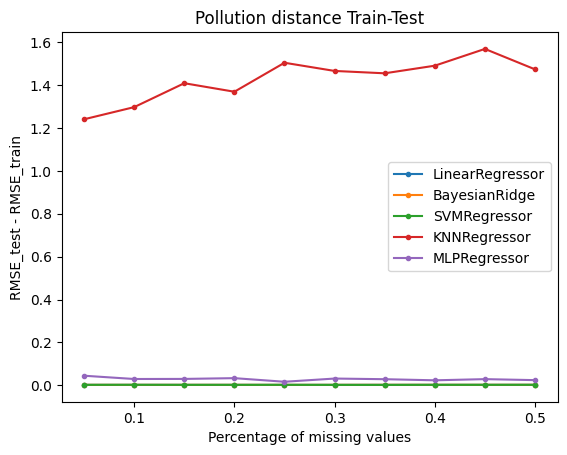

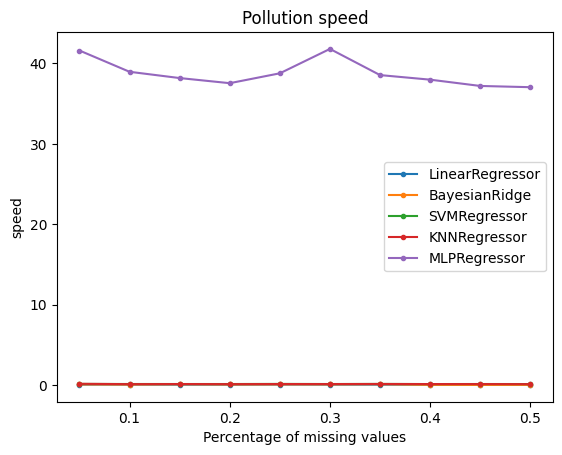



IMPUTATION EVALUATION PLOTS...



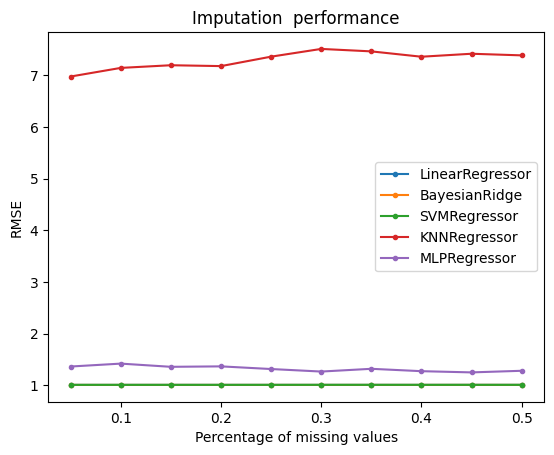

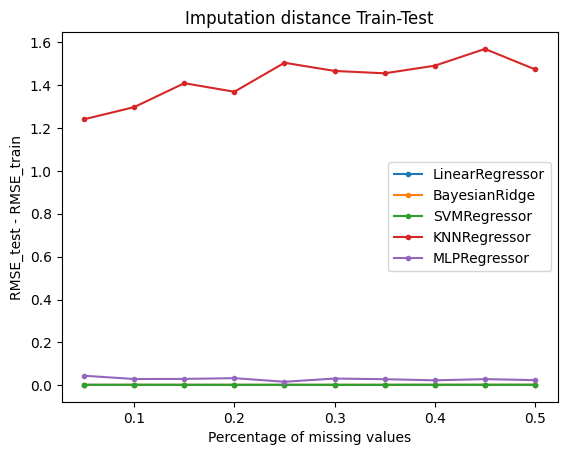

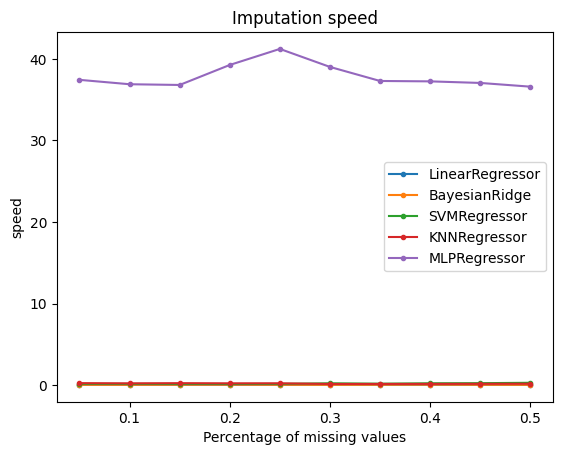

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.0, '1': 0.0, '2':  0.5, '3': 0.5}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=2,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)



# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_3/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_3/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_3/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_3/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_3/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_3/")

# EXPERIMENT - 4

Informative Features:
['Feature 0', 'Feature 1']

dataset creation for  0.05 % of missing values...
MNAR_values:  250
Remaining values:  0
TOTAL MISSING VALUES:  250

dataset creation for  0.1 % of missing values...
MNAR_values:  500
Remaining values:  0
TOTAL MISSING VALUES:  500

dataset creation for  0.15 % of missing values...
MNAR_values:  750
Remaining values:  0
TOTAL MISSING VALUES:  750

dataset creation for  0.2 % of missing values...
MNAR_values:  1000
Remaining values:  0
TOTAL MISSING VALUES:  1000

dataset creation for  0.25 % of missing values...
MNAR_values:  1250
Remaining values:  0
TOTAL MISSING VALUES:  1250

dataset creation for  0.3 % of missing values...
MNAR_values:  1500
Remaining values:  0
TOTAL MISSING VALUES:  1500

dataset creation for  0.35 % of missing values...
MNAR_values:  1750
Remaining values:  0
TOTAL MISSING VALUES:  1750


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 1.006121597530436, 'di

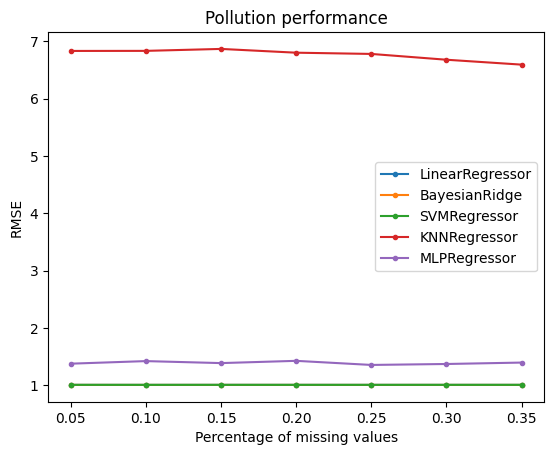

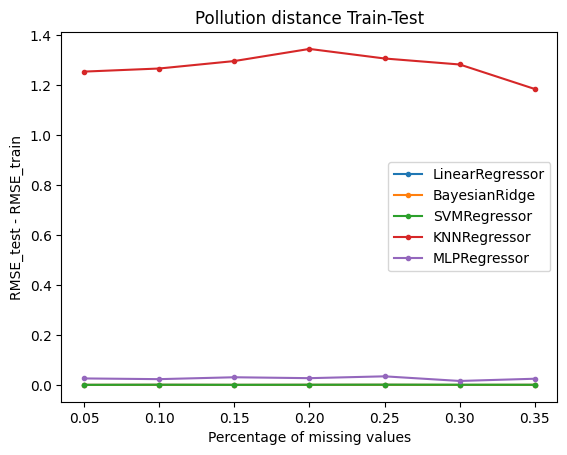

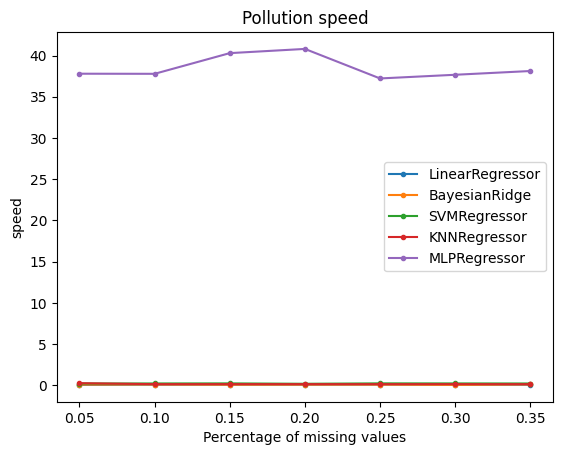



IMPUTATION EVALUATION PLOTS...



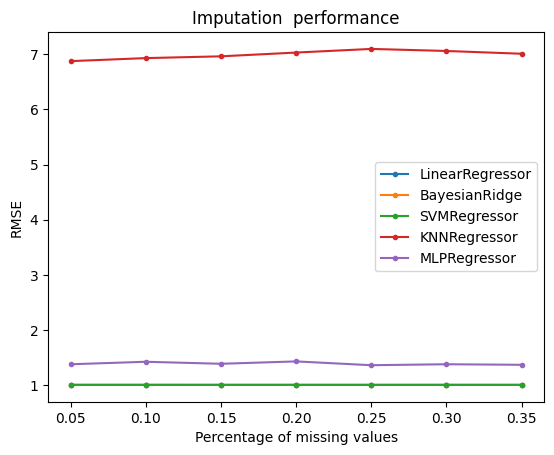

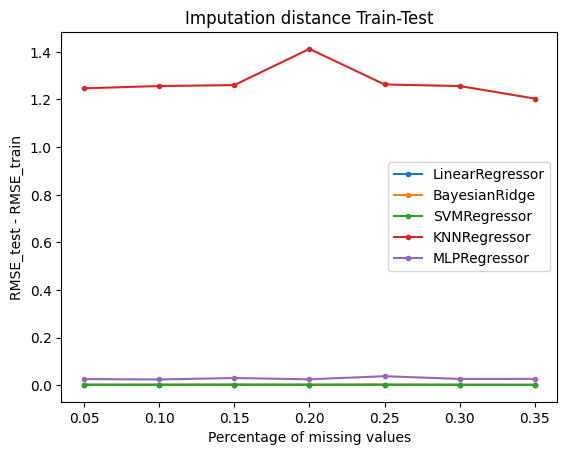

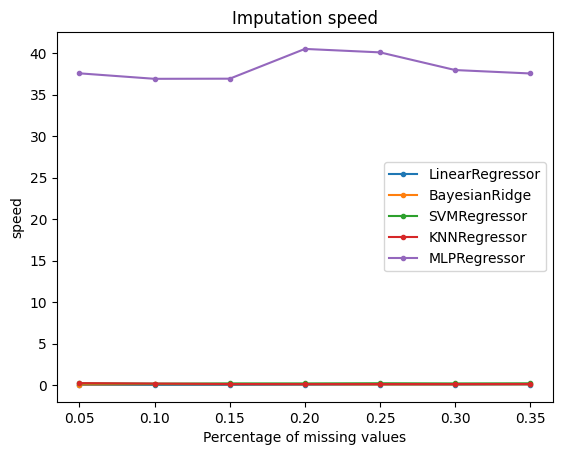

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35]


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=2,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)

# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 2,0.5,0.8,seed = SEED) # parameters: dataframe - %_of_missing values - feature - percentile - probability_to_miss - seed
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 2,0.5,0.8,seed = SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,80)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_4/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_4/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_4/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_4/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_4/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_4/")

# EXPERIMENT - 5

Informative Features:
['Feature 0', 'Feature 1']

dataset creation for  0.05 % of missing values...
MNAR_values:  250
Remaining values:  0
TOTAL MISSING VALUES:  250

dataset creation for  0.1 % of missing values...
MNAR_values:  500
Remaining values:  0
TOTAL MISSING VALUES:  500

dataset creation for  0.15 % of missing values...
MNAR_values:  750
Remaining values:  0
TOTAL MISSING VALUES:  750

dataset creation for  0.2 % of missing values...
MNAR_values:  1000
Remaining values:  0
TOTAL MISSING VALUES:  1000

dataset creation for  0.25 % of missing values...
MNAR_values:  1250
Remaining values:  0
TOTAL MISSING VALUES:  1250

dataset creation for  0.3 % of missing values...
MNAR_values:  1500
Remaining values:  0
TOTAL MISSING VALUES:  1500

dataset creation for  0.35 % of missing values...
MNAR_values:  1750
Remaining values:  0
TOTAL MISSING VALUES:  1750


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 8.974799533452991, 'di

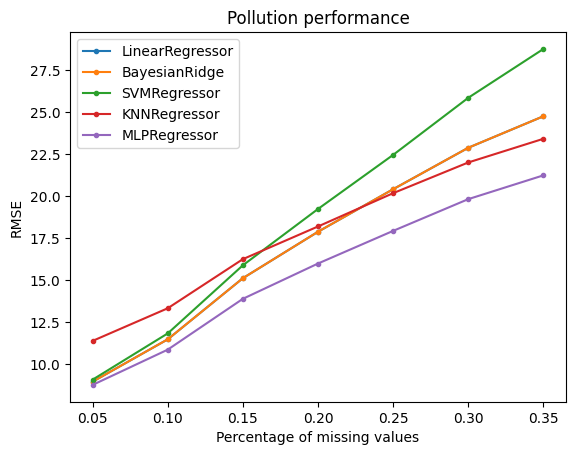

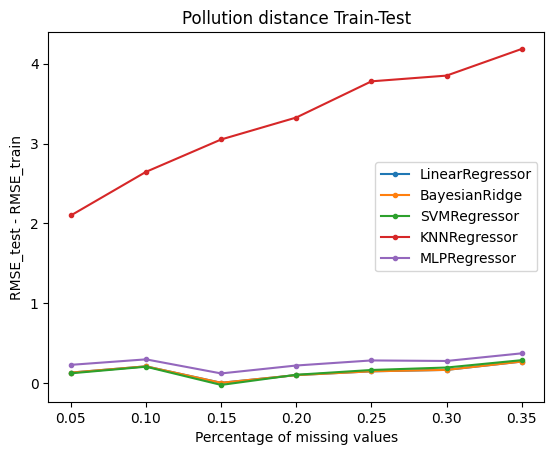

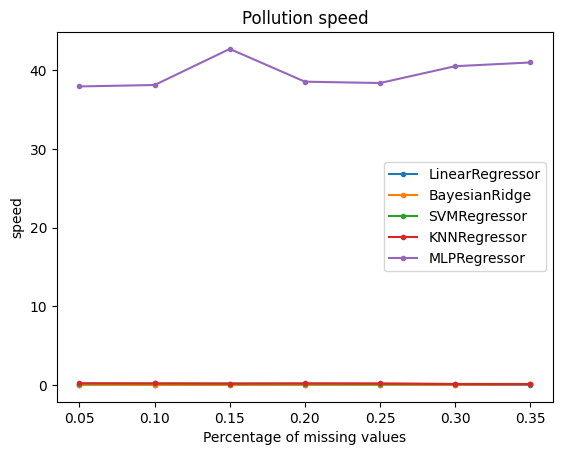



IMPUTATION EVALUATION PLOTS...



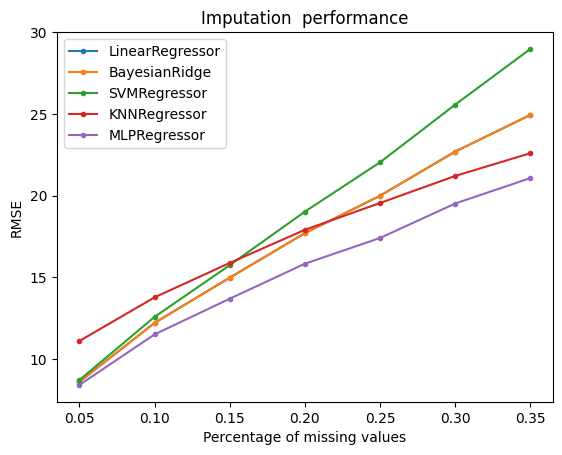

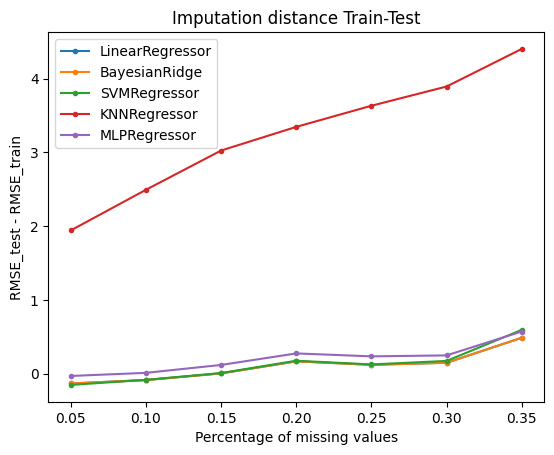

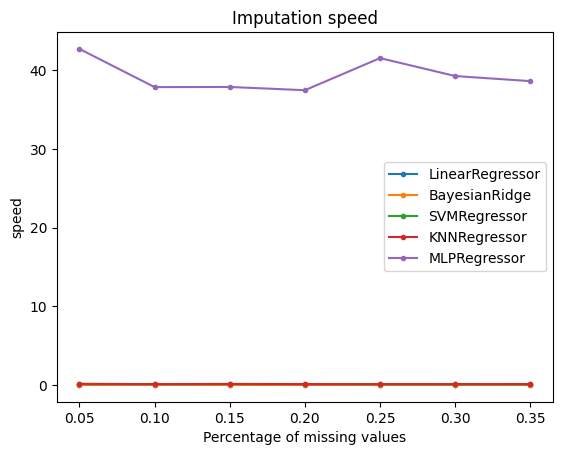

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35]


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=2,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)

# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 0,0.5,0.8,seed = SEED) # parameters: dataframe - %_of_missing values - feature - percentile - probability_to_miss - seed
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 0,0.5,0.8,seed = SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,80)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_5/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_5/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_5/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_5/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_5/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_5/")

# EXPERIMENT - 6

Informative Features:
['Feature 0', 'Feature 1']

dataset creation for  0.05 % of missing values...
MNAR_values:  250
Remaining values:  0
TOTAL MISSING VALUES:  250

dataset creation for  0.1 % of missing values...
MNAR_values:  500
Remaining values:  0
TOTAL MISSING VALUES:  500

dataset creation for  0.15 % of missing values...
MNAR_values:  750
Remaining values:  0
TOTAL MISSING VALUES:  750

dataset creation for  0.2 % of missing values...
MNAR_values:  1000
Remaining values:  0
TOTAL MISSING VALUES:  1000

dataset creation for  0.25 % of missing values...
MNAR_values:  1250
Remaining values:  0
TOTAL MISSING VALUES:  1250

dataset creation for  0.3 % of missing values...
MNAR_values:  1438
Remaining values:  62
TOTAL MISSING VALUES:  1492

dataset creation for  0.35 % of missing values...
MNAR_values:  1385
Remaining values:  365
TOTAL MISSING VALUES:  1718

dataset creation for  0.4 % of missing values...
MNAR_values:  1405
Remaining values:  595
TOTAL MISSING VALUES:  1947

dat

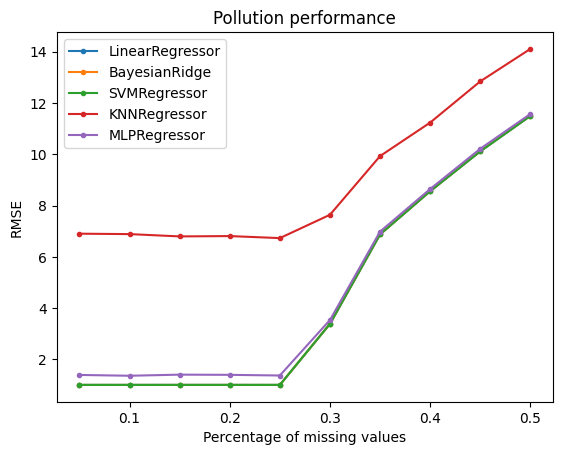

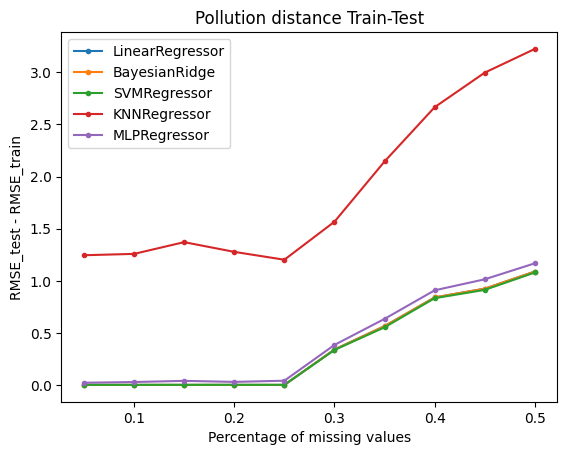

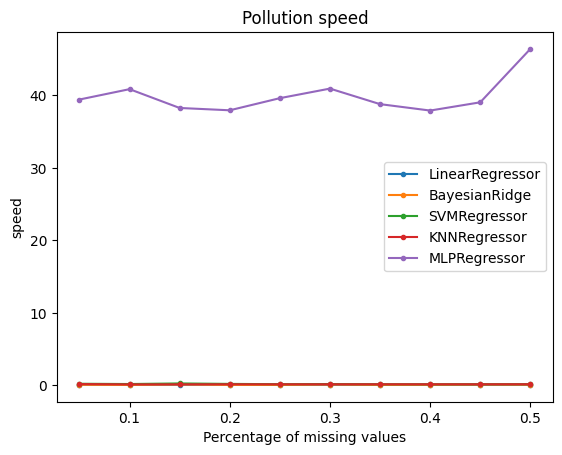



IMPUTATION EVALUATION PLOTS...



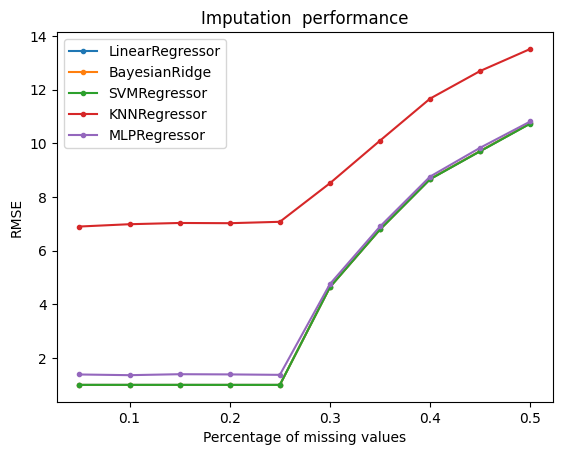

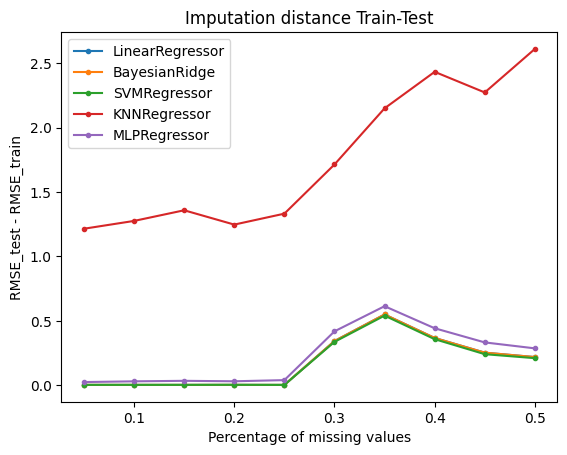

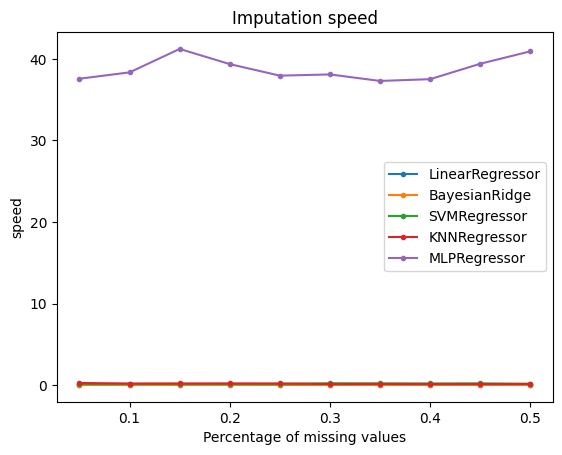

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=2,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)

# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 2,0.6,0.7,seed = SEED) # parameters: dataframe - %_of_missing values - feature - percentile - probability_to_miss - seed
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 2,0.6,0.7,seed = SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,80)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_6/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_6/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_6/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_6/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_6/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_6/")

# EXPERIMENT - 7

Informative Features:
['Feature 0', 'Feature 1']

dataset creation for  0.05 % of missing values...
MNAR_values:  250
Remaining values:  0
TOTAL MISSING VALUES:  250

dataset creation for  0.1 % of missing values...
MNAR_values:  500
Remaining values:  0
TOTAL MISSING VALUES:  500

dataset creation for  0.15 % of missing values...
MNAR_values:  750
Remaining values:  0
TOTAL MISSING VALUES:  750

dataset creation for  0.2 % of missing values...
MNAR_values:  1000
Remaining values:  0
TOTAL MISSING VALUES:  1000

dataset creation for  0.25 % of missing values...
MNAR_values:  1250
Remaining values:  0
TOTAL MISSING VALUES:  1250

dataset creation for  0.3 % of missing values...
MNAR_values:  1383
Remaining values:  117
TOTAL MISSING VALUES:  1492

dataset creation for  0.35 % of missing values...
MNAR_values:  1407
Remaining values:  343
TOTAL MISSING VALUES:  1726

dataset creation for  0.4 % of missing values...
MNAR_values:  1392
Remaining values:  608
TOTAL MISSING VALUES:  1959

da

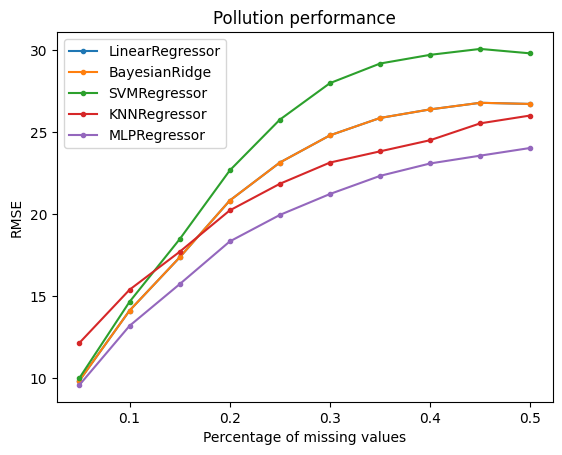

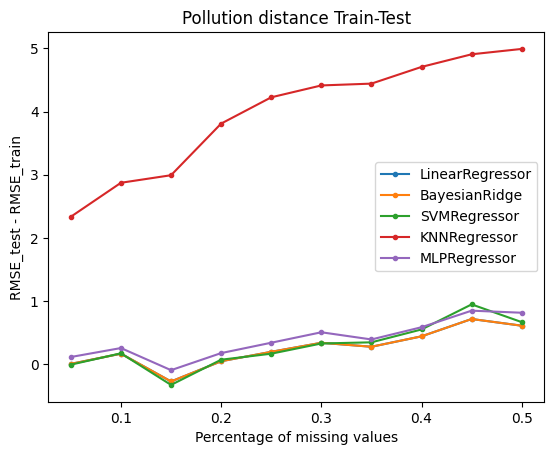

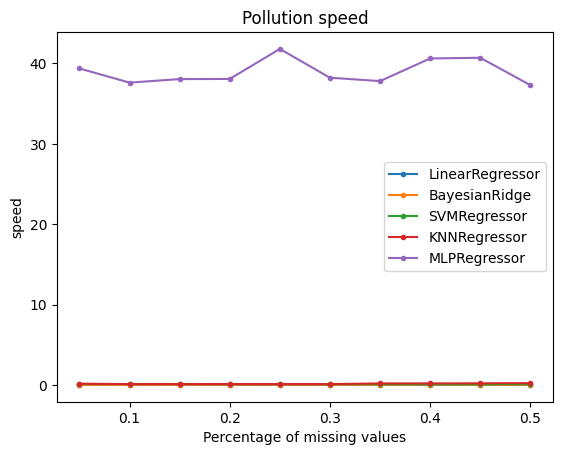



IMPUTATION EVALUATION PLOTS...



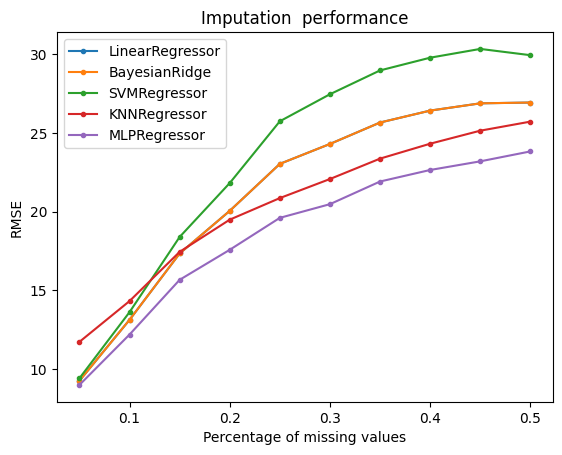

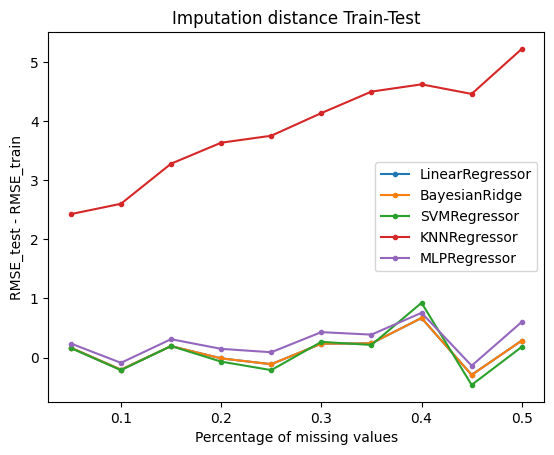

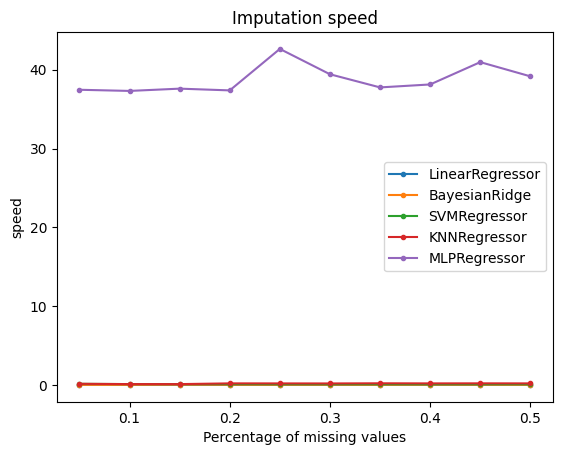

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=2,
                  n_targets=1,
                  bias=0,
                  effective_rank=None,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )
informative_features = [f"Feature {i}" for i, coef in enumerate(coef) if abs(coef) > 0] # give the informative_features
print("Informative Features:")
print(informative_features)

# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 0,0.6,0.7,seed = SEED) # parameters: dataframe - %_of_missing values - feature - percentile - probability_to_miss - seed
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   generate_MNAR_values_with_uniform(X_pollution, percentage, 0,0.6,0.7,seed = SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,80)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_7/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_7/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_7/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_7/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_7/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_7/")

# EXPERIMENT - 8

Informative Features:
['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3']

dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  974

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1903

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2773

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3625

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  4428

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  5163

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5904

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  6601

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  7224

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  7833


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 1.0481598207452791, 'distance': -0.0

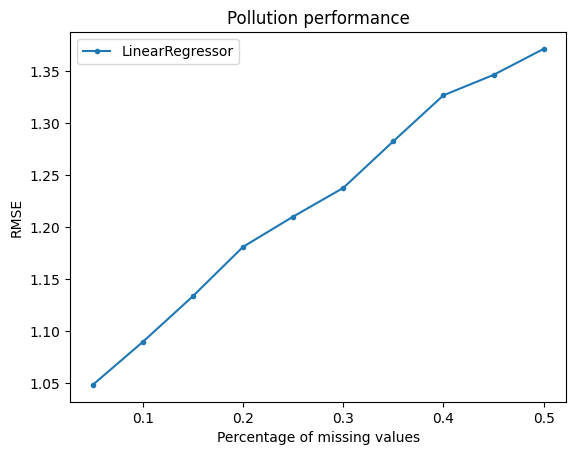

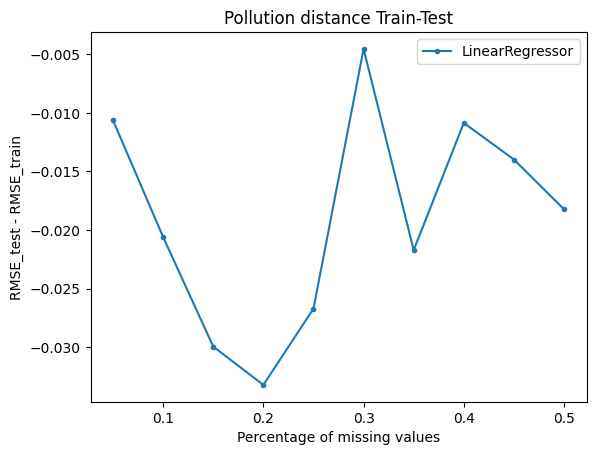

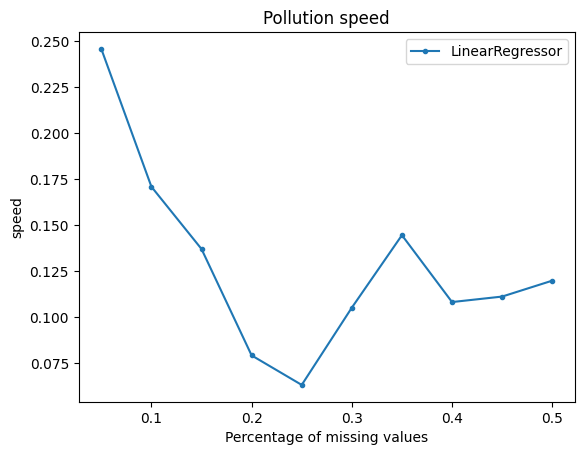



IMPUTATION EVALUATION PLOTS...



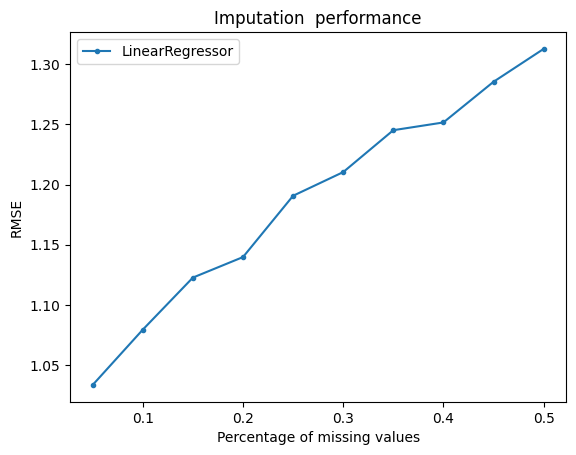

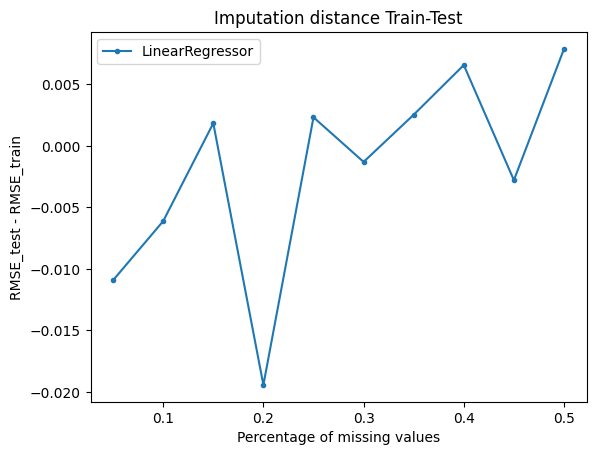

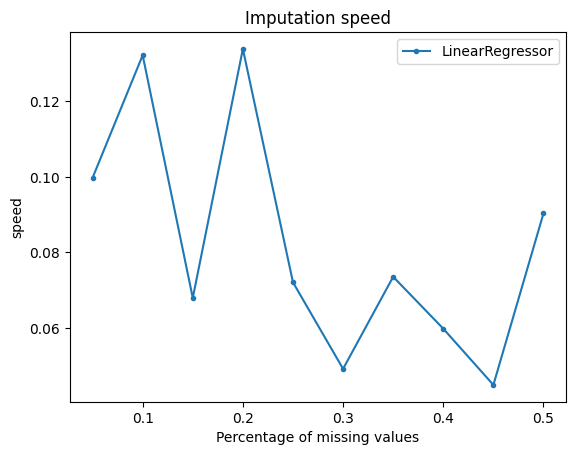

In [19]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.25, '1': 0.25, '2':  0.25, '3': 0.25}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=4,
                  n_targets=1,
                  bias=0,
                  effective_rank=3,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )



# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    #dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_8/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_8/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_8/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_8/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_8/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_8/")

# EXPERIMENT - 9


dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  974

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1903

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2773

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3625

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  4428

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  5163

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5904

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  6601

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  7224

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  7833


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 1.0481598207452791, 'distance': -0.010653118964600694, 'speed': 0.02291274070739746}
Training for LinearRegress

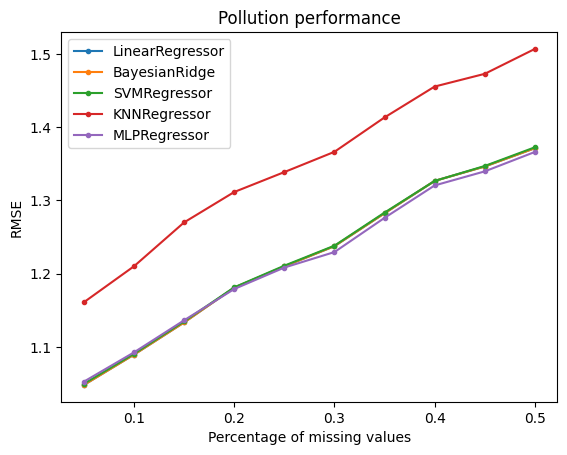

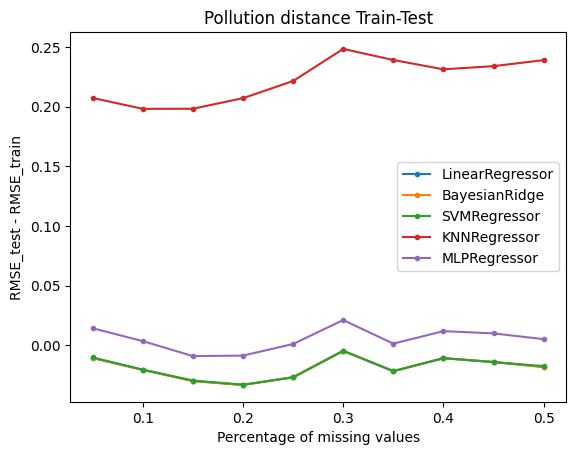

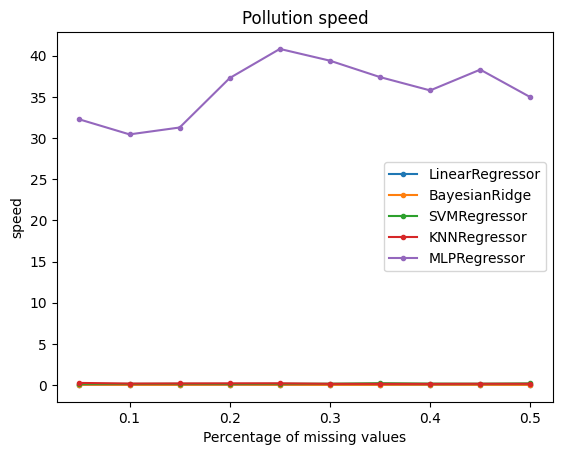



IMPUTATION EVALUATION PLOTS...



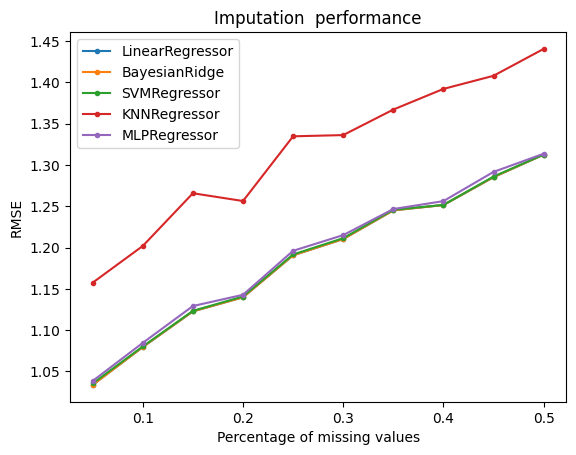

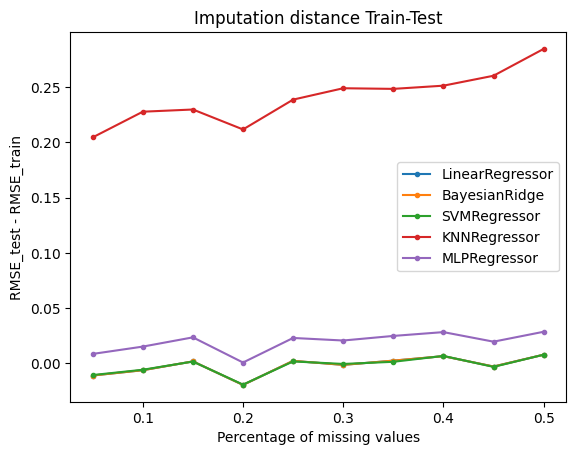

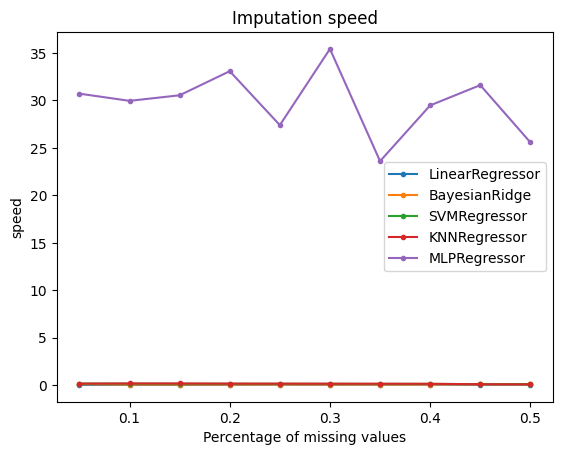

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.25, '1': 0.25, '2':  0.25, '3': 0.25}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=4,
                  n_targets=1,
                  bias=0,
                  effective_rank=2,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )



# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    #dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_9/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_9/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_9/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_9/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_9/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_9/")

# EXPERIMENT - 10


dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  974

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1903

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2773

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3625

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  4428

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  5163

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5904

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  6601

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  7224

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  7833


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 1.0363670141231345, 'distance': -0.008329268112834382, 'speed': 0.026077747344970703}
Training for LinearRegres

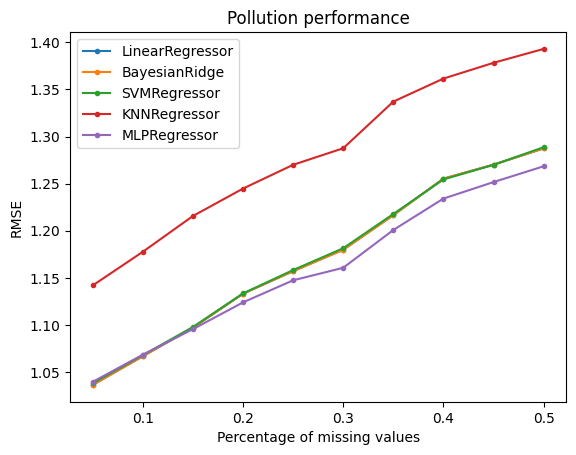

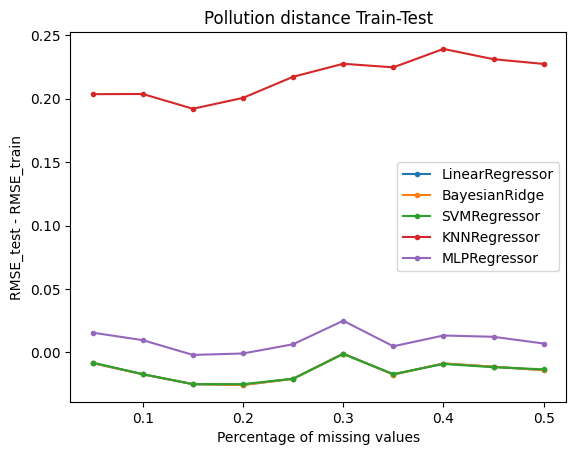

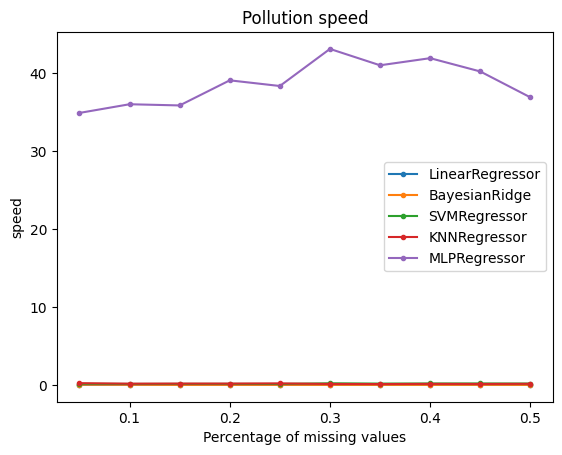



IMPUTATION EVALUATION PLOTS...



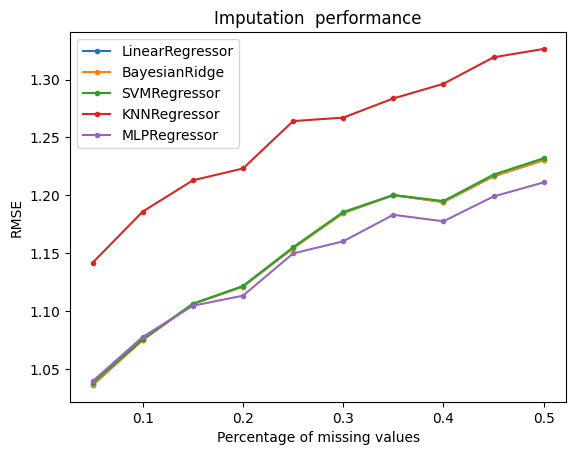

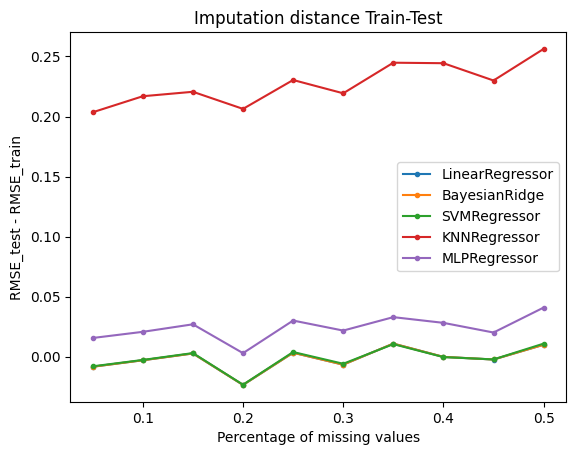

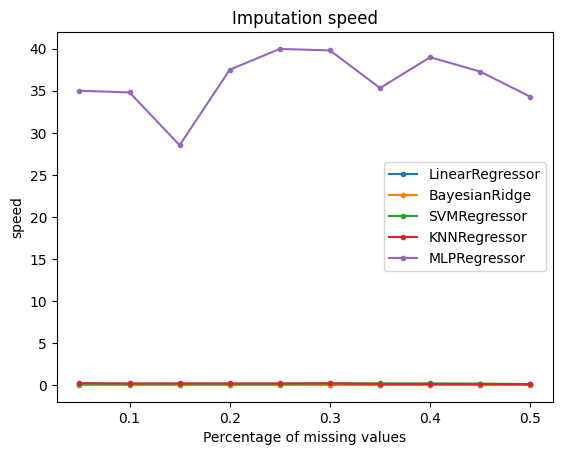

In [ ]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.25, '1': 0.25, '2':  0.25, '3': 0.25}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=4,
                  n_targets=1,
                  bias=0,
                  effective_rank=1,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )



# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    #dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)


# RESULTS EVALUATION ON POLLUTION
print("\n\nPOLLUTION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_10/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_10/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_pollution,title="Pollution speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_10/")



# RESULTS EVALUATION ON POLLUTION
print("\n\nIMPUTATION EVALUATION PLOTS...\n")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation  performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance",path ="experiment_10/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation distance Train-Test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test",path ="experiment_10/")
plot(x_axis_values=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50], x_label="Percentage of missing values", results=results_for_each_algorithm_imputation,title="Imputation speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed",path ="experiment_10/")

In [21]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor","MLPRegressor"]
REGRESSION_ALGORITHMS = ["LinearRegressor"]


PERCENTAGES_OF_MISSING_VALUES = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
feature_distribution = {'0':  0.25, '1': 0.25, '2':  0.25, '3': 0.25}


X, y, coef = make_dataset_for_regression(
                  n_samples=5000,
                  n_features=4,
                  n_informative=4,
                  n_targets=1,
                  bias=0,
                  effective_rank=3,
                  tail_strength=0.5,
                  noise=1,
                  seed=SEED,
                  shuffle=True,
                  )



# DATA POLLUTION
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:
   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)


# POLLUTION EVALUATION
print("\n\nPOLLUTION EVALUATION...")
results_for_each_algorithm_pollution = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    # DATA ANALYSIS
    results_analysis = regression(dataset, y, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_pollution.append(results_single_algorithm)





# DATA POLLUTION (SAME OF BEFORE)
datasets_pollution = []
for percentage in PERCENTAGES_OF_MISSING_VALUES:

   X_pollution = X.copy()
   X_pollution = pd.DataFrame(X_pollution)
   print("\ndataset creation for ",percentage, "% of missing values...")
   delete_values_with_uniform_distribution(X_pollution, percentage, feature_distribution,SEED)
   print('TOTAL MISSING VALUES: ',X_pollution.isna().sum().sum())
   datasets_pollution.append(X_pollution)

# EVALUTION ON IMPUTATION
results_for_each_algorithm_imputation = []
for algorithm in REGRESSION_ALGORITHMS:
  results_single_algorithm = []
  print("\nRESULTS FOR: ", algorithm,"\n")
  for dataset in datasets_pollution:
    dataset_I , y_I = drop_rows_above_threshold(dataset,y)

    dataset_I = simple_imputation(dataset_I,'mean')
    #dataset_I = KNN_imputation(dataset_I,10)
    #random_imputation(dataset_I,0)
    #dataset_I = KNN_mice(dataset_I,10,100)
    #dataset_I = BayesianRidge_mice(dataset_I,100)
    results_analysis = regression(dataset_I, y_I, algorithm, SEED)
    print(results_analysis)
    results_single_algorithm.append(results_analysis)
  results_for_each_algorithm_imputation.append(results_single_algorithm)




dataset creation for  0.05 % of missing values...
TOTAL MISSING VALUES:  974

dataset creation for  0.1 % of missing values...
TOTAL MISSING VALUES:  1903

dataset creation for  0.15 % of missing values...
TOTAL MISSING VALUES:  2773

dataset creation for  0.2 % of missing values...
TOTAL MISSING VALUES:  3625

dataset creation for  0.25 % of missing values...
TOTAL MISSING VALUES:  4428

dataset creation for  0.3 % of missing values...
TOTAL MISSING VALUES:  5163

dataset creation for  0.35 % of missing values...
TOTAL MISSING VALUES:  5904

dataset creation for  0.4 % of missing values...
TOTAL MISSING VALUES:  6601

dataset creation for  0.45 % of missing values...
TOTAL MISSING VALUES:  7224

dataset creation for  0.5 % of missing values...
TOTAL MISSING VALUES:  7833


POLLUTION EVALUATION...

RESULTS FOR:  LinearRegressor 

Training for LinearRegressor...
{'mean_perf': 1.0566205022645299, 'distance': -0.012223094225665254, 'speed': 0.29988694190979004}
Training for LinearRegress